In [1]:
import pandas as pd
import numpy as np
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt 
import tensorflow as tf

df = pd.read_csv("CHD.csv", header=0)
print (df.describe())


              age        chd
count  100.000000  100.00000
mean    44.380000    0.43000
std     11.721327    0.49757
min     20.000000    0.00000
25%     34.750000    0.00000
50%     44.000000    0.00000
75%     55.000000    1.00000
max     69.000000    1.00000


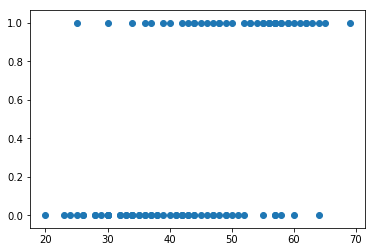

In [2]:
plt.figure()
plt.scatter(df['age'], df['chd'])

count    100.000000
mean       3.786261
std        1.000000
min        1.706291
25%        2.964681
50%        3.753841
75%        4.692301
max        5.886705
Name: age, dtype: float64
[[0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 0 1]]


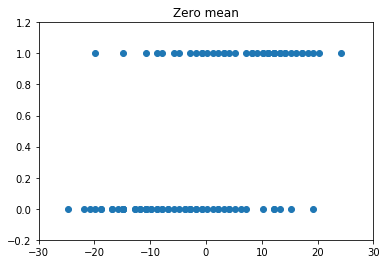

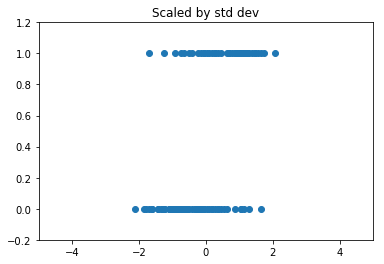

In [5]:
plt.figure() 
plt.axis ([-30,30,-0.2,1.2])
plt.title('Zero mean')
plt.scatter(df['age']-44.8,df['chd']) 
plt.figure()
plt.axis ([-5,5,-0.2,1.2])
plt.title('Scaled by std dev')
plt.scatter((df['age']-44.8)/11.7,df['chd']) 


print ((df['age']/11.721327).describe())


learning_rate = 0.2
training_epochs = 5
batch_size = 100
display_step = 1
sess = tf.Session()
b=np.zeros((100,2))

print (sess.run(tf.one_hot(indices = [1, 3, 2, 4], depth=5, on_value = 1, off_value = 0, axis = 1 , name = "a")))

x = tf.placeholder("float", [None, 1]) 
y = tf.placeholder("float", [None, 2]) 
# Create model
# Set model weights
W = tf.Variable(tf.zeros([1, 2]))
b = tf.Variable(tf.zeros([2]))

In [9]:

activation = tf.nn.softmax(tf.matmul(x, W) + b) 

cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(activation), axis=1)) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

init = tf.global_variables_initializer()

Epoch: 00001 cost= 0.63873076
[ 0.04824295 -0.04824295]
[[-0.17459483  0.17459483]]
Epoch: 00002 cost= 0.58948964
[ 0.08091066 -0.08091066]
[[-0.29231569  0.29231566]]
Epoch: 00003 cost= 0.56595357
[ 0.10427245 -0.10427245]
[[-0.37499282  0.37499279]]
Epoch: 00004 cost= 0.55375648
[ 0.12176144 -0.12176143]
[[-0.43521613  0.4352161 ]]
Epoch: 00005 cost= 0.54701936
[ 0.13527818 -0.13527818]
[[-0.48031801  0.48031798]]


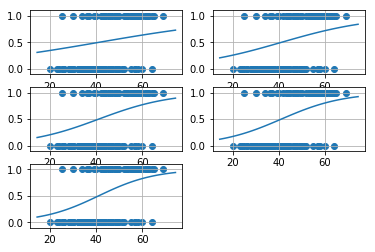

In [10]:
with tf.Session() as sess:
    tf.train.write_graph(sess.graph, './graphs','graph.pbtxt')
    sess.run(init)
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    
    
    graphnumber=321
    
    
    plt.figure(1)
    

    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(400/batch_size)
        

        for i in range(total_batch):
                       
            temp=tf.one_hot(indices = df['chd'].values, depth=2, on_value = 1, off_value = 0, axis = -1 , name = "a")      
            batch_xs, batch_ys = (np.transpose([df['age']])-44.38)/11.721327, temp
            
            
            sess.run(optimizer, feed_dict={x: batch_xs.astype(float), y: batch_ys.eval()})
            
            
            avg_cost += sess.run(cost, feed_dict={x: batch_xs.astype(float), y: batch_ys.eval()})/total_batch
        

        if epoch % display_step == 0:
            print ("Epoch:", '%05d' % (epoch+1), "cost=", "{:.8f}".format(avg_cost))
            
            
            
            trX = np.linspace(-30, 30, 100) 
            print (b.eval())
            print (W.eval())
            Wdos=2*W.eval()[0][0]/11.721327
            bdos=2*b.eval()[0]
            
            
            trY = np.exp(-(Wdos*trX)+bdos)/(1+np.exp(-(Wdos*trX)+bdos) )
            
            
            plt.subplot(graphnumber)
            graphnumber=graphnumber+1
            
        
            plt.scatter((df['age']),df['chd']) 
            plt.plot(trX+44.38,trY) 
            plt.grid(True)
            
        
        plt.savefig("test.svg")  